In [4]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ap = pd.DataFrame.from_csv('MSFT.csv')
ap.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [6]:
ap_data = ap.loc['2015-10-01':'2019-12-31']
ap_data['PriceDiff'] = abs(ap_data['Close'].shift(-1) - ap_data['Close'])
print(ap_data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-10-01   44.750000   44.750000   43.750000   44.610001   40.863850   
2015-10-02   44.270000   45.570000   43.919998   45.570000   41.743233   
2015-10-05   45.750000   46.889999   45.700001   46.630001   42.714226   
2015-10-06   46.330002   47.180000   46.220001   46.750000   42.824142   
2015-10-07   47.099998   47.349998   45.950001   46.799999   42.869942   
2015-10-08   46.560001   47.520000   46.500000   47.450001   43.465359   
2015-10-09   47.450001   47.540001   46.919998   47.110001   43.153908   
2015-10-12   46.980000   47.070000   46.500000   47.000000   43.053150   
2015-10-13   46.560001   47.130001   46.560001   46.889999   42.952385   
2015-10-14   46.650002   47.099998   46.529999   46.680000   42.760025   
2015-10-15   47.009998   47.029999   46.529999   47.009998   43.062305   
2015-10-16   47.020000   47.540001   4

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
#Simple linear regression
#yi=β0+β1∗xi+ϵi
#We shall base on the association between Volume and Difference and create a simple linear regression model. 
#Let's use python in estimating the values of B0 and B1 (intercept and slope)


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


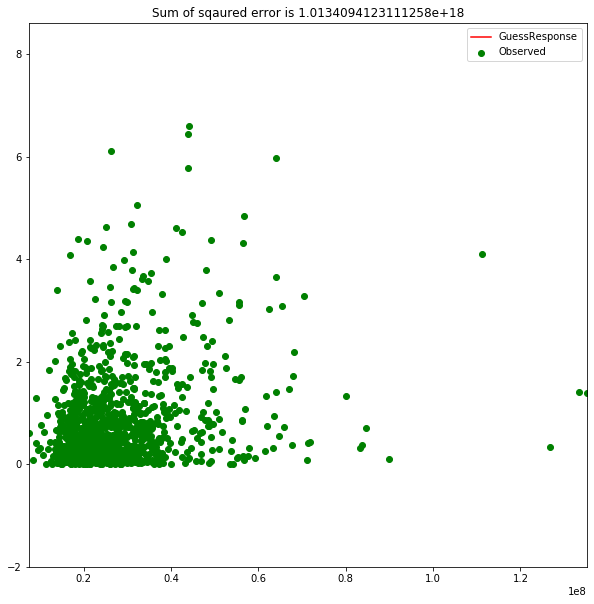

In [8]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
ap_data['GuessResponse'] = b0 + b1*ap_data['Volume']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
ap_data['observederror'] = ap_data['PriceDiff'] - ap_data['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((ap_data['observederror'])**2)).sum()))
plt.scatter(ap_data['Volume'], ap_data['PriceDiff'], color='g', label='Observed')
plt.plot(ap_data['Volume'], ap_data['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(ap_data['Volume'].min()-2, ap_data['Volume'].max()+2)
plt.ylim(ap_data['PriceDiff'].min()-2, ap_data['PriceDiff'].max()+2)
plt.show()

In [9]:
df = pd.read_csv('MSFT.csv')
df['PriceDiff'] = ap['Close'].shift(-1) - ap['Close']
df.to_csv('MSFT.csv', index = False)

In [10]:
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.062549   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.064783   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.065899   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.064224   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.063107   
5     1986-03-20    0.098090    0.098090    0.094618    0.095486    0.061432   
6     1986-03-21    0.095486    0.097222    0.091146    0.092882    0.059756   
7     1986-03-24    0.092882    0.092882    0.089410    0.090278    0.058081   
8     1986-03-25    0.090278    0.092014    0.089410    0.092014    0.059198   
9     1986-03-26    0.092014    0.095486    0.091146    0.094618    0.060873   
10    1986-03-27    0.094618    0.096354    0.094618    0.096354    0.061990   
11    1986-03-31    0.096354    0.096354

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


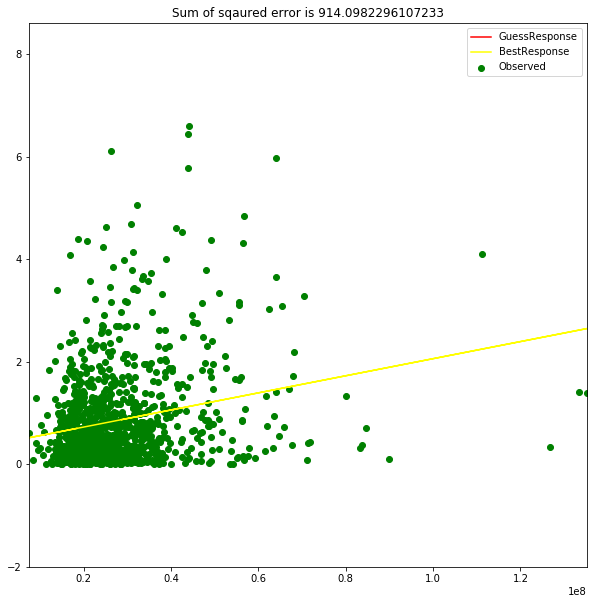

In [11]:




model = smf.ols(formula= 'PriceDiff~Volume', data=ap_data).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]

ap_data['BestResponse'] = b0_ols + b1_ols*ap_data['Volume']

# Also want to know the error of of guess...
ap_data['error'] = ap_data['PriceDiff'] - ap_data['BestResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((ap_data['error'])**2)).sum()))
plt.scatter(ap_data['Volume'], ap_data['PriceDiff'], color='g', label='Observed')
plt.plot(ap_data['Volume'], ap_data['GuessResponse'], color='red', label='GuessResponse')
plt.plot(ap_data['Volume'], ap_data['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(ap_data['Volume'].min()-2, ap_data['Volume'].max()+2)
plt.ylim(ap_data['PriceDiff'].min()-2, ap_data['PriceDiff'].max()+2)
plt.show()

In [12]:
#Refer to the P-value of Volume Confidence Interval and R-square to evaluate the performance.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceDiff   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     57.96
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           5.87e-14
Time:                        09:18:38   Log-Likelihood:                -1433.2
No. Observations:                1069   AIC:                             2870.
Df Residuals:                    1067   BIC:                             2880.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3923      0.067      5.821      0.000       0.260       0.525
Volume      1.666e-08   2.19e-09      7.613      0.000    1.24e-08     2.1e-08
==============================================================================
Omnibus:                      484.870   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2466.305
Skew:                           2.093   Prob(JB):                         0.00
Kurtosis:                       9.152   Cond. No.                     7.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""